In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
anirudhchauhan_retail_store_inventory_forecasting_dataset_path = kagglehub.dataset_download('anirudhchauhan/retail-store-inventory-forecasting-dataset')

print('Data source import complete.')


100%|██████████| 1.51M/1.51M [00:00<00:00, 21.1MB/s]

Extracting files...


Data source import complete.


# Retail Store Inventory Demand Analysis Tasks

This notebook will focus on analyzing and forecasting retail store inventory demand using the provided dataset. Below is the structured task list:

### 1. Exploratory Data Analysis (EDA)
- Visualize sales trends by store, product, and region.
- Analyze patterns in demand during holidays, promotions, and varying weather conditions.

### 2. Time Series Demand Forecasting
- Build ARIMA, Prophet, and LSTM models to predict daily product demand.
- Compare model performance using metrics like RMSE or MAE.

### 3. Inventory Optimization
- Identify optimal inventory levels to minimize stockouts and overstocking.
- Analyze sales trends to support supply chain decisions.

### 4. Dynamic Pricing Strategy
- Develop a pricing model considering discounts, demand, and competitor prices.
- Optimize pricing to maximize revenue while maintaining demand.

### 5. Feature Engineering
- Create features like rolling averages, lag values, and weather-impact scores.
- Encode categorical data such as regions and product categories.

### 6. Impact Analysis
- Quantify the effects of holidays, promotions, and weather on sales and demand.

### 7. Model Deployment
- Prepare the forecasting or pricing models for real-time use in inventory and pricing systems.

### 8. Evaluation and Reporting
- Evaluate models with test datasets and summarize findings in visual dashboards.


# Step 1: Exploratory Data Analysis (EDA)

## Objective:
Understand the dataset and identify key patterns for further analysis.

## Tasks:
1. Check dataset structure, column names, and data types.
2. Summarize numerical columns (e.g., `Inventory Level`, `Units Sold`, `Price`).
3. Identify missing values and outliers.
4. Visualize sales trends, inventory levels, and price vs. sales.
5. Analyze categorical variables (`Category`, `Region`) for average sales and inventory.

## Outcome:
Clear understanding of the dataset with key insights and visualizations.


## Task 1: Check Dataset Structure

## Objective:
Understand the basic structure of the dataset.

## Steps:
1. **Dataset Shape:** Display the number of rows and columns.
2. **Column Names & Data Types:** Show the names of columns and their data types.
3. **First 5 Rows:** Inspect the first few rows to get a glimpse of the data.

## Outcome:
Identify dataset dimensions, column types, and preview the data.


### just getting the file path

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/retail_store_inventory.csv')


# Display the first few rows to understand the data layout
print("\nFirst 5 Rows of the Dataset:")
df.head()



First 5 Rows of the Dataset:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
# Display the structure of the dataset
print("Dataset Structure:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Structure:
Rows: 73100, Columns: 15


In [ ]:
# Display column names and their data types
print("\nColumn Names and Data Types:")
print(df.dtypes)



Column Names and Data Types:
Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object


## Task 2: Data Overview

## Objective:
Summarize key statistics and identify potential issues in the data.

## Steps:
1. **Summary Statistics:** Calculate basic statistics (mean, median, min, max, etc.) for numerical columns like `Inventory Level`, `Units Sold`, and `Price`.
2. **Missing Values:** Check for any missing values in the dataset.
3. **Outliers Detection:** Identify potential outliers in numerical data using methods like IQR or z-scores.

## Outcome:
Obtain a summary of key data characteristics and identify any issues to address.

In [ ]:
# Set global display option
pd.options.display.float_format = '{:,.2f}'.format
# 1. Summary statistics for numerical columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,"73,100.00","73,100.00","73,100.00","73,100.00","73,100.00","73,100.00","73,100.00","73,100.00"
mean,274.47,136.46,110.00,141.49,55.14,10.01,0.50,55.15
std,129.95,108.92,52.28,109.25,26.02,7.08,0.50,26.19
min,50.00,0.00,20.00,-9.99,10.00,0.00,0.00,5.03
25%,162.00,49.00,65.00,53.67,32.65,5.00,0.00,32.68
50%,273.00,107.00,110.00,113.02,55.05,10.00,0.00,55.01
75%,387.00,203.00,155.00,208.05,77.86,15.00,1.00,77.82
max,500.00,499.00,200.00,518.55,100.00,20.00,1.00,104.94


In [ ]:
# 2. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


### creating box plot to show the outliers

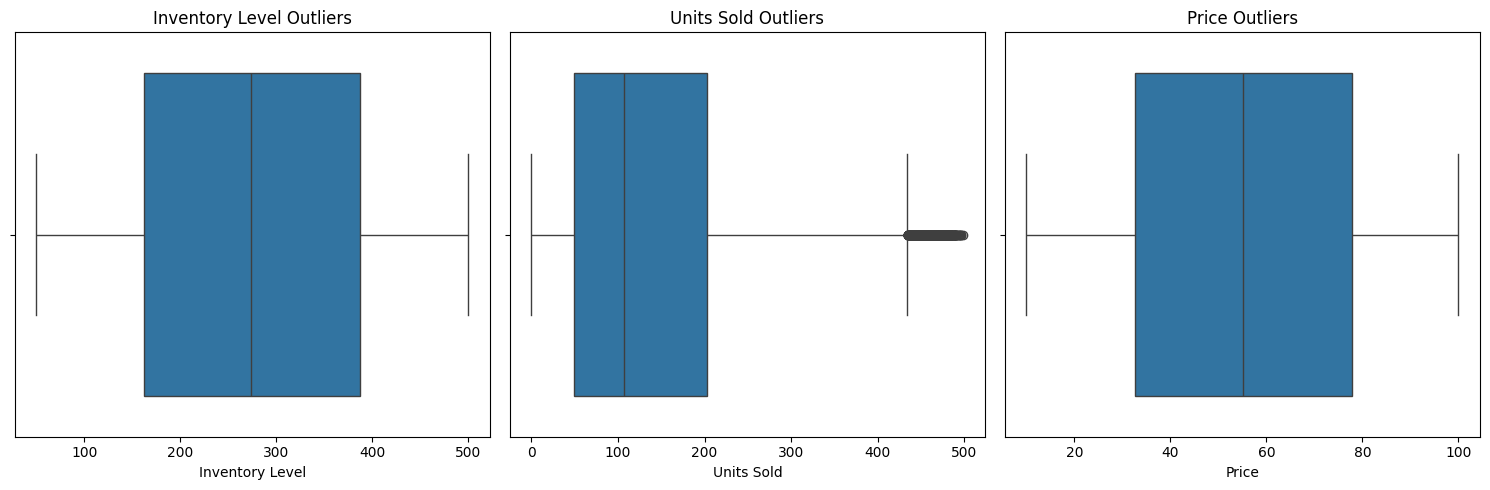

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Visualize data to check for outliers
# Plot boxplots for 'Inventory Level', 'Units Sold', and 'Price'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Inventory Level'])
plt.title('Inventory Level Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Units Sold'])
plt.title('Units Sold Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Price'])
plt.title('Price Outliers')

plt.tight_layout()
plt.show()

### units sold contain outliers , now checking how much data counts are outlers

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(df.shape)
print(df[df['Units Sold'] > upper_bound].shape)
print(df[df['Units Sold'] < lower_bound].shape)


(73100, 15)
(715, 15)
(0, 15)


### the above results are showing the outlier are in the upper_bound only and less count comparing to the orignal one so we can remove the outliers

In [ ]:
# 3. Detect potential outliers using IQR (Interquartile Range)
Q1 = df[['Inventory Level', 'Units Sold', 'Price']].quantile(0.25)
Q3 = df[['Inventory Level', 'Units Sold', 'Price']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Inventory Level', 'Units Sold', 'Price']] < (Q1 - 1.5 * IQR)) |
            (df[['Inventory Level', 'Units Sold', 'Price']] > (Q3 + 1.5 * IQR)))
print("\nPotential Outliers Detected:")
print(outliers.sum())


Potential Outliers Detected:
Inventory Level      0
Units Sold         715
Price                0
dtype: int64


In [ ]:
# 2. Detect and remove outliers using IQR (Interquartile Range)
Q1 = df[['Inventory Level', 'Units Sold', 'Price']].quantile(0.25)
Q3 = df[['Inventory Level', 'Units Sold', 'Price']].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition
outliers_condition = ((df[['Inventory Level', 'Units Sold', 'Price']] <= (Q1 - 1.5 * IQR)) |
                      (df[['Inventory Level', 'Units Sold', 'Price']] >= (Q3 + 1.5 * IQR)))

# Remove outliers
df_cleaned = df[~outliers_condition.any(axis=1)]

# Display the shape before and after removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
df=df_cleaned

Original dataset shape: (73100, 15)
Cleaned dataset shape: (72362, 15)


### Explanation of `df_cleaned = df[~outliers_condition.any(axis=1)]`

This line of code is used to filter out rows from a DataFrame (`df`) that contain outliers, based on a condition defined in the `outliers_condition` DataFrame.

### Components:
1. **`outliers_condition.any(axis=1)`**:
   - `outliers_condition`: A DataFrame that contains boolean values (`True` or `False`), where `True` represents an outlier.
   - **`any(axis=1)`**: This checks if any `True` values are present in each row (`axis=1` refers to rows). If at least one column in a row contains a `True` value, the result for that row will be `True`. Otherwise, it will be `False`.

2. **`~` (tilde operator)**:
   - This is a logical NOT operation. It inverts the boolean values, changing `True` to `False` and `False` to `True`.

3. **`df[~outliers_condition.any(axis=1)]`**:
   - This filters the original DataFrame `df` by selecting only rows where `any(axis=1)` is `False` (i.e., rows that do not contain any outliers).
   - The tilde (`~`) negates the condition, so rows with no outliers are kept, and rows with outliers are removed.

### Why use `any(axis=1)` and `axis=1`?
- **`any(axis=1)`**: Ensures that we consider rows with outliers in any of the columns. If a row has an outlier in at least one column, it will be flagged as an outlier.
- **`axis=1`**: This tells pandas to apply the `any()` function across rows, not columns (which would be `axis=0`).

### Summary:
This code removes rows from the DataFrame that contain outliers in any of the specified columns by using `outliers_condition.any(axis=1)`, and then negates the condition to keep only the clean rows.


## Task 3: Data Visualization

## Objective:
Visualize the relationships between key variables to identify trends and insights.

## Steps:
1. **Sales Trends Over Time:** Plot `Units Sold` over time (`Date`) to visualize overall sales trends.
2. **Inventory Levels Across Regions:** Compare `Inventory Level` across different regions and categories using bar charts or boxplots.
3. **Price vs Sales Relationship:** Analyze how the `Price` affects `Units Sold` using a scatter plot.
4. **Sales by Category and Region:** Aggregate sales data by `Category` and `Region` and visualize with bar charts.

## Outcome:
Gain insights into how time, region, price, and category impact sales trends.


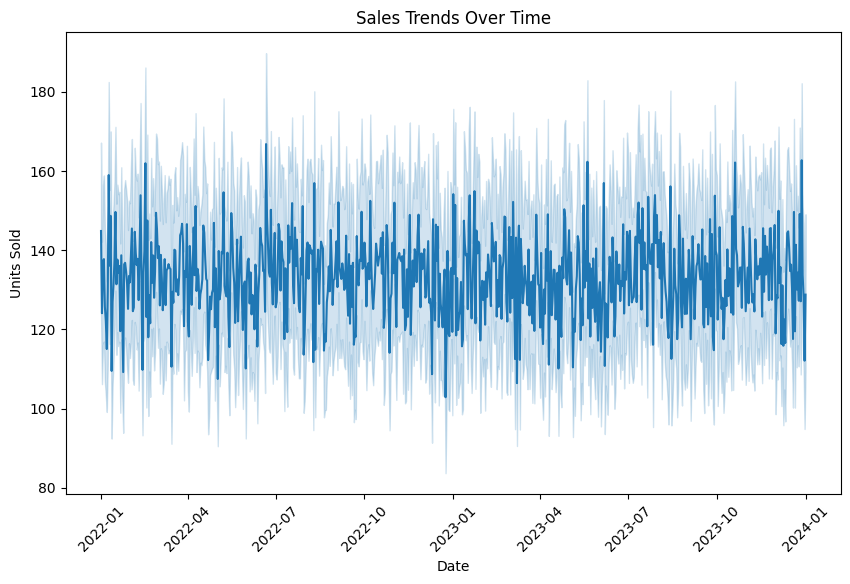

In [ ]:
# 1. Sales Trends Over Time
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Units Sold')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


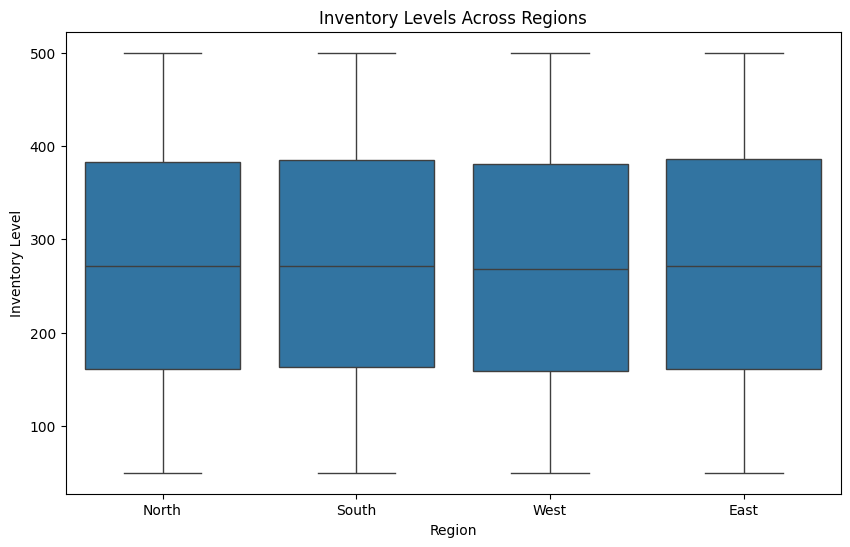

In [ ]:
# 2. Inventory Levels Across Regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Inventory Level')
plt.title('Inventory Levels Across Regions')
plt.xlabel('Region')
plt.ylabel('Inventory Level')
plt.show()


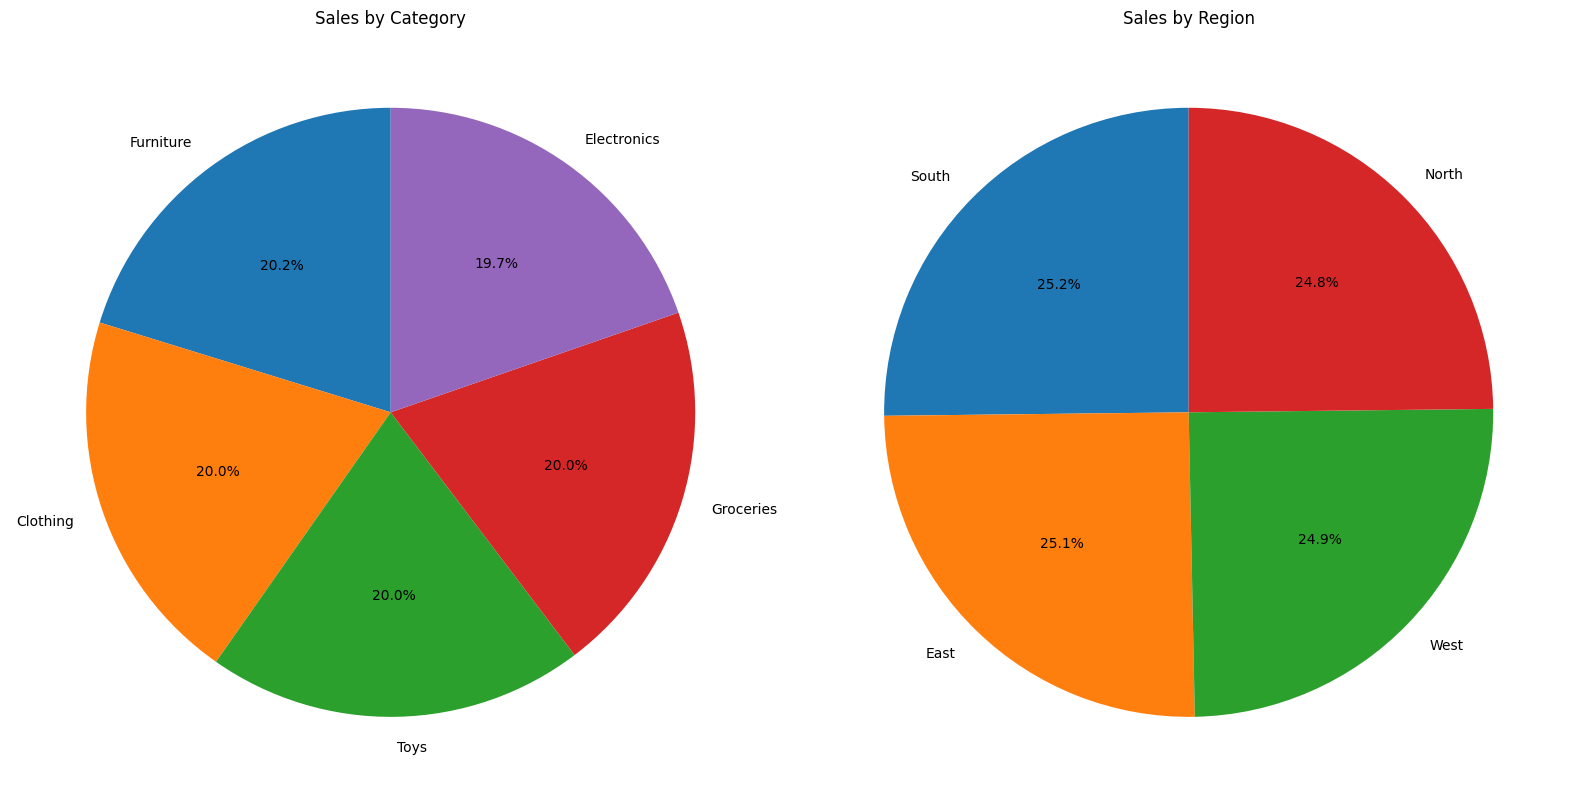

In [ ]:
# 4. Sales by Category and Region
sales_by_category = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


# Plot pie charts in a subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for sales by category
axes[0].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sales by Category')

# Pie chart for sales by region
axes[1].pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sales by Region')

plt.tight_layout()
plt.show()

## Task 4: Analyze Categorical Variables

## Objective:
Analyze the average sales and inventory levels by `Category` and `Region` to identify patterns and trends.

## Steps:
1. **Average Sales by Category:** Calculate the average `Units Sold` for each product `Category`.
2. **Average Inventory by Category:** Calculate the average `Inventory Level` for each product `Category`.
3. **Average Sales by Region:** Calculate the average `Units Sold` for each `Region`.
4. **Average Inventory by Region:** Calculate the average `Inventory Level` for each `Region`.

## Outcome:
Understand how sales and inventory vary across different categories and regions, which can help in decision-making for inventory management and product promotion.


In [ ]:
# 1. Average Sales by Category
avg_sales_by_category = df.groupby('Category')['Units Sold'].mean()
print("\nAverage Sales by Category:")
print(avg_sales_by_category)


Average Sales by Category:
Category
Clothing      133.45
Electronics   131.95
Furniture     134.19
Groceries     133.34
Toys          133.09
Name: Units Sold, dtype: float64


In [ ]:
# 2. Average Inventory by Category
avg_inventory_by_category = df.groupby('Category')['Inventory Level'].mean()
print("\nAverage Inventory by Category:")
print(avg_inventory_by_category)

In [ ]:
# 3. Average Sales by Region
avg_sales_by_region = df.groupby('Region')['Units Sold'].mean()
print("\nAverage Sales by Region:")
print(avg_sales_by_region)



Average Sales by Region:
Region
East    133.46
North   132.73
South   133.95
West    132.67
Name: Units Sold, dtype: float64


In [ ]:
# 4. Average Inventory by Region
avg_inventory_by_region = df.groupby('Region')['Inventory Level'].mean()
print("\nAverage Inventory by Region:")
print(avg_inventory_by_region)


Average Inventory by Region:
Region
East    273.14
North   272.52
South   273.32
West    270.58
Name: Inventory Level, dtype: float64


# Step 2: Time Series Demand Forecasting

## Objective:
Build and evaluate models to predict daily product demand using time series forecasting techniques.

## Tasks:
1. **ARIMA Model**:
   - Build an ARIMA (AutoRegressive Integrated Moving Average) model to forecast daily demand.
   - Tune the parameters (p, d, q) for optimal performance.

2. **Prophet Model**:
   - Use the Facebook Prophet model to predict demand, which handles seasonality and holidays well.

3. **LSTM Model**:
   - Build an LSTM (Long Short-Term Memory) model for demand prediction, which can capture long-term dependencies in the data.

4. **Model Comparison**:
   - Evaluate the performance of each model using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).
   - Compare the results to determine the best model for daily demand forecasting.

## Outcome:
Identify the most effective model for accurately predicting product demand, which can be used for inventory management and demand planning.


## Task1 : ARIMA Model for Demand Forecasting

## Objective:
Build an ARIMA (AutoRegressive Integrated Moving Average) model to forecast daily product demand. Tune the model parameters (p, d, q) to achieve optimal performance.

## Steps:
1. **Data Preparation:**
   - Convert the `Date` column to a datetime format.
   - Set the `Date` as the index of the dataframe for time series forecasting.
   
2. **Check for Stationarity:**
   - Use the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.
   - If the data is not stationary, apply differencing to make it stationary.

3. **Model Building (ARIMA):**
   - Split the data into training and test sets.
   - Train the ARIMA model on the training data using different values of (p, d, q) and select the best combination.
   
4. **Model Evaluation:**
   - Predict future demand using the trained ARIMA model.
   - Evaluate the model's performance using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).

## Outcome:
Generate forecasts for daily product demand and assess the performance of the ARIMA model. Use this model to understand trends and improve inventory planning.


### Before to start first understand the ARIMA MODEL

### ARIMA (1,1,1) Model Example: Forecasting Monthly Sales

### ARIMA Model Explanation

ARIMA (AutoRegressive Integrated Moving Average) is a model used for time series forecasting. It combines three components:

1. **AR(1)**: Autoregressive part that uses 1 lag (previous value).
2. **I(1)**: Integrated part means we take the first difference to make the series stationary.
3. **MA(1)**: Moving average uses the 1 previous forecast #error.

## Example: Monthly Sales Data

Let's use the following monthly sales data:

- **Jan**: 100
- **Feb**: 120
- **Mar**: 130
- **Apr**: 125

### Step 1: Make the Series Stationary (I(1) – First Differencing)

We calculate the **first difference** (subtract the previous value from the current value) to remove any trend:

- Difference between Jan and Feb: `120 - 100 = 20`
- Difference between Feb and Mar: `130 - 120 = 10`
- Difference between Mar and Apr: `125 - 130 = -5`

Now, we have the **differenced series**:

- **Difference**: `[20, 10, -5]`

This makes the data more stationary.

### Step 2: Apply the AR (AutoRegressive) Model

AR(1) means we use the previous value to predict the next value. For example:

- If we use the last value (Apr), we predict the next based on a coefficient (usually learned during model training).

For simplicity, let’s assume the coefficient is `0.8`.

- The predicted difference for May would be: `0.8 * -5 = -4`

### Step 3: Apply the MA (Moving Average) Model

MA(1) means we adjust the forecast by the error from the last prediction.

- The error from the previous forecast (Apr) was: `Actual value (125) - Predicted value (130) = -5`

Now, we add this error term to our prediction for May:

- For May prediction, after applying MA(1): `Predicted difference for May (-4) + 0.1 * error (-5) = -4 + (-0.5) = -4.5`

### Step 4: Forecast the Actual Value

Finally, we reverse the differencing step by adding the predicted difference for May to the last actual value (Apr):

- **Predicted May value** = `Apr (125) + Predicted difference (-4.5) = 120.5`

## Conclusion

The ARIMA(1,1,1) model predicts that the sales for May will be **120.5** based on the past data.

---

**Note**: This is a simplified calculation. In real applications, the coefficients (AR, I, MA) are learned using statistical methods or optimization techniques, but this is the general process.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# 1. Data Preparation
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
# Aggregate the data by day and sum the 'Units Sold' for daily demand
daily_demand = df.resample('D')['Units Sold'].sum()
daily_demand

,Units Sold
Date,
2022-01-01,14484
2022-01-02,12035
2022-01-03,13681
2022-01-04,13636
2022-01-05,12572
...,...
2023-12-28,16271
2023-12-29,13368
2023-12-30,12684


### ADF Test for Stationarity

### Objective:
To check if the time series data is stationary using the Augmented Dickey-Fuller (ADF) test.

### Explanation:
1. **Stationarity**: A time series is considered stationary if its statistical properties, like mean, variance, and autocorrelation, remain constant over time. In simple terms, the pattern in the data does not change, making it easier to model and forecast.
   - **Example**: A stationary series will have a constant average sales figure and consistent variability over time.
   
2. **ADF Test**: The Augmented Dickey-Fuller test is used to determine whether a time series is stationary or has a unit root (non-stationary).
   
3. **Test Results**:
   - **ADF Statistic**: A negative value that indicates how strong the trend is in the time series.
   - **p-value**: Indicates whether we can reject the null hypothesis that the series is non-stationary. If the p-value is below 0.05, we can reject the null hypothesis and consider the series stationary.

### Conclusion:
- If the p-value is low (typically < 0.05), the series is stationary.
- If the p-value is high (typically > 0.05), the series is non-stationary and may require differencing.
- ** Note **
-Since the p-value is much lower than 0.05, we can conclude that the time series is stationary. This means that the statistical properties of the data (such as mean and variance) do not change over time, making it suitable for forecasting without additional transformation.

In [ ]:
# 2. Check for Stationarity
# Perform ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

adf_test(daily_demand)

ADF Statistic: -26.615139637468065
p-value: 0.0


In [ ]:
# 3. Model Building (ARIMA)
# Split the data into training and testing sets
train_size = int(len(daily_demand) * 0.8)
train, test = daily_demand[:train_size], daily_demand[train_size:]

### Fitting the ARIMA Model

### Objective:
Fit an ARIMA model to the training data using initial parameters (p=1, d=1, q=1) and train the model to predict future values.

### Explanation:
1. **ARIMA Model**: ARIMA stands for AutoRegressive Integrated Moving Average, a model used for forecasting time series data.
   - **p (AutoRegressive part)**: Refers to the number of lag observations included in the model. It indicates how past values influence future predictions.
   - **d (Differencing part)**: Refers to the number of times the series needs to be differenced to make it stationary.
   - **q (Moving Average part)**: Refers to the number of lagged forecast errors in the prediction equation.

2. **Fitting the Model**:
   - We start by setting the parameters (p=1, d=1, q=1) as an initial guess. These values represent a basic configuration of the ARIMA model.
   - The `model.fit()` function fits the ARIMA model to the training data, learning the best parameters for the given data.

3. **Why This Step**:
   - Fitting the ARIMA model allows the model to capture patterns, trends, and relationships in the time series, which will then be used for forecasting future values.

### Outcome:
Once the model is fitted, we can use it to generate forecasts and evaluate its performance.

In [ ]:
# Fit the ARIMA model (p=1, d=1, q=1 as a starting point, can be tuned)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
# 4. Forecasting
forecast = model_fit.forecast(steps=len(test))

In [ ]:
# 5. Model Evaluation
# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

RMSE: 974.5606683151158


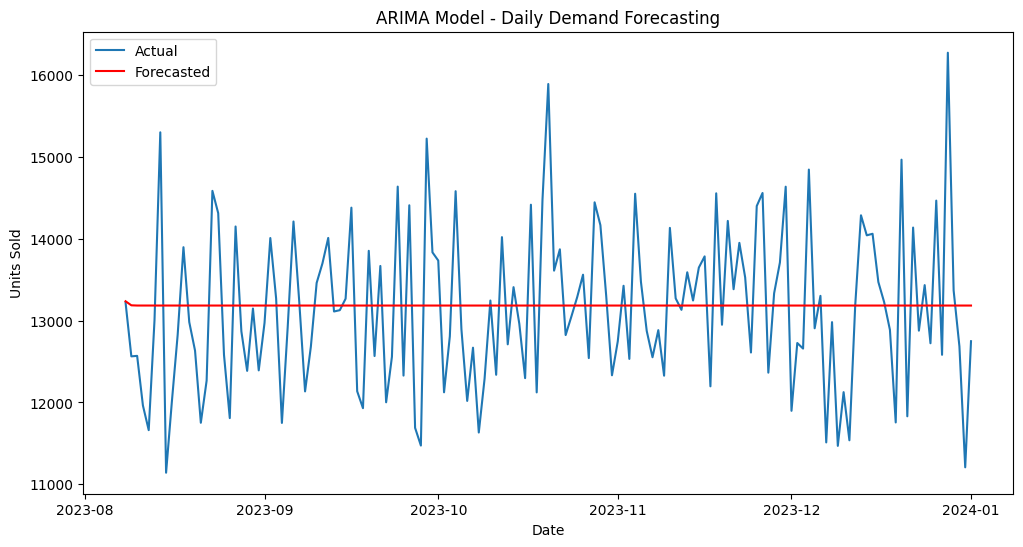

In [ ]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecasted', color='red')
plt.title('ARIMA Model - Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

## Task 2 : LSTM Model for Demand Forecasting

### Objective:
Build an LSTM (Long Short-Term Memory) model to predict daily product demand. LSTM is a type of recurrent neural network (RNN) that is effective for time series forecasting due to its ability to capture long-term dependencies in data#

## Steps:

1. **Data Preparation:**
   - Normalize the `Units Sold` values to make them suitable for training an LSTM model (e.g., MinMaxScaler).
   - Prepare the data by creating sequences of past observations to predict the future demand. Each sequence will represent a window of time (e.g., past 7 days).

2. **Train-Test Split:**
   - Split the dataset into training and testing sets (80% training, 20% testing).
   - Reshape the data to a 3D format that LSTM requires: [samples, time steps, features].

3. **Build the LSTM Model:**
   - Create an LSTM model using Keras with appropriate layers (LSTM, Dense) and specify the input shape.
   - Compile the model with an optimizer (e.g., Adam) and loss function (e.g., MSE).

4. **Train the Model:**
   - Fit the model on the training data, specifying the number of epochs and batch size.

5. **Forecasting:**
   - Use the trained LSTM model to forecast the future daily demand.

6. **Model Evaluation:**
   - Evaluate the model performance using RMSE or MAE.
   - Compare the predicted demand with the actual demand and## visualize the results.

## Outcome:
Generate demand forecasts using the LSTM model, assess its performance, and compare the results with the ARIMA model to choose the best model for demand prediction.
ce with the ARIMA model.


In [ ]:
# reverse the origianl index to the instead of date to process further
df.reset_index(inplace=True)
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72357,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
72358,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
72359,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
72360,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [ ]:
# 1. Data Preparation
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
Date,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
# Aggregate the data by day and sum the 'Units Sold' for daily demand
daily_demand = df.resample('D')['Units Sold'].sum()

### Explanation of Data Normalization

In this step, we normalize the data using the `MinMaxScaler` from `sklearn.preprocessing`. The purpose of normalization is to transform the data into a range of values that are easier for machine learning models, like LSTM, to process effectively. Specifically, the `MinMaxScaler` scales the data to a fixed range, in this case, between 0 and 1een 0 and 1.

### Why Normalize?
- **LSTM Sensitivity**: LSTM models work better when input values are in a similar range, and normalization ensures that no feature dominates the others due to large value differences.
- **Faster Convergence**: Normalized data helps the model to converge faster and more reliably during training by maintaining a consistent scale across features.

After applying the `MinMaxScaler`, the data is transformed into a format that is ready for training the LSTM model.


In [ ]:
# 2. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
daily_demand_scaled = scaler.fit_transform(daily_demand.values.reshape(-1, 1))

In [ ]:
daily_demand_scaled[:5]

array([[0.70295291],
       [0.31205108],
       [0.57478053],
       [0.56759777],
       [0.39776536]])

### Explanation: Prepare Data for LSTM (Create Sequences)


## Purpose:
The goal is to prepare the data for the LSTM model by creating input-output sequences. This step is crucial as LSTMs work with time steps, where each sequence of data represents a specific window of time#.
#

## Process:
1. **Input-Output Pairs**:
   - For each `time_step` (e.g., 7 days), we take the past 7 days of demand data as input (`X`).
   - The target output (`y`) is the demand for the next day after the 7 days.

2. **Sliding Window Approach**:
   - A "sliding window" technique is used to iterate through the dataset and form overlapping sequences. For instance:
     - Days 1–7 → Input, Day 8 → Output
     - Days 2–8 → Input, Day 9 → Output
     - And so on...

3. **Structure of the Data**:
   - The inputs (`X`) are stored as a 2D array where each row represents a sequence of `time_step` days.
   - The outputs (`y`) are stored as a 1D array where each value corresponds to the demand of the day immediately after the input sequence.

4. **Importance of Time Steps**:
   - In this case, we use a `time_step` of 7, meaning the model will use the past 7 days of demand to predict the next day's demand. This helps the LSTM capture temporal patterns and depend#en#cies in the data.

## Output:
- **X**: A 3D array of shape `[samples, time steps, features]` for LSTM input.
- **y**: A 1D array of target values corresponding to each sequence.

This step ensures the data is structured in a way that aligns with the LSTM's requirements, allowing it to learn patterns over time.


In [ ]:
def create_dataset(data):
    X, y = [], []
    for i in range(len(data) - 2):  # Adjusted loop for one-day input
        X.append([data[i, 0]])  # Use only the current day's data as input
        y.append(data[i + 1, 0])  # Target is the next day's data
    return np.array(X), np.array(y)


In [ ]:
X, y = create_dataset(daily_demand_scaled)

In [ ]:
print(X[0])
print(y[0])

[0.70295291]
0.3120510774142058


### Why Reshaping `X` for LSTM?

### Purpose:
LSTM models require the input data to be in a 3D format: `[samples, time steps, features]`.

### Explanation:
1. **Samples**:
   - The number of sequences (input examples) created from the data.
   - Each sequence is treated as a single "sample" for the model.

2. **Time Steps**:
   - The number of past observations in each sequence (`time_step`).
   - Represents how many previous data points the model will use to predict the next value.

3. **Features**:
   - The number of features in each time step. In this case, we have only one feature (da#ily demand).

### Why Reshape?
The reshaping ensures the data matches the input format required by LSTM layers, allowing the model to process the sequences correctly and learn temporal dependencies.


In [ ]:
# Reshape X to be in the format [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
X[0]

array([[0.70295291]])

In [ ]:
# 4. Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### LSTM Model Explanation

This is a simple LSTM (Long Short-Term Memory) model built using Keras for time series forecasting. Here's a breakdown of the layers:

1. **First LSTM Layer**:
   - `LSTM(128, return_sequences=True, input_shape=(time_step, 1))`
   - This layer has 128 LSTM units. It outputs the full sequence (with `return_sequences=True`) for the next layer.
   - `input_shape=(time_step, 1)` indicates that each input data point has `time_step` number of time steps and 1 feature.

2. **Dropout Layer**:
   - `Dropout(0.2)`
   - This layer randomly drops 20% of the neurons during training to prevent overfitting.

3. **Second LSTM Layer**:
   - `LSTM(64, return_sequences=False)`
   - This layer has 64 LSTM units. It doesn't return the sequence, only the output for the final timestep (hence `return_sequences=False`).

4. **Dropout Layer**:
   - `Dropout(0.2)`
   - Again, 20% of the neurons are dropped to avoid overfitting.

5. **Dense Layer**:
   - `Dense(1)`
   - The output layer with a single neuron to predict the value (e.g., price, demand, etc.).

This architecture is typically used for forecasting tasks where temporal patterns need to be learned from sequential data.


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, 1)))  # First LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(64, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))  # Dropout
model.add(Dense(1))  # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Compilation Explanation

After building the LSTM model, we compile it using the following settings:

1. **Optimizer**:
   - `Adam(learning_rate=0.001)`
   - We use the **Adam optimizer** with a learning rate of `0.001`. Adam is an adaptive learning rate optimization algorithm that adjusts the learning rate during training to improve performance.

2. **Loss Function**:
   - `loss='mean_squared_error'`
   - The model is trained to minimize the **Mean Squared Error (MSE)**, which is the average of the squared differences between predicted and actual values. This is commonly used for regression tasks.

This compilation step prepares the model for training.


In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
# 6. Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2418
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1200
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0302
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0309
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279


In [ ]:
# 7. Forecasting
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [ ]:
# 8. Inverse Transform to get original values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# 9. Model Evaluation (RMSE)
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'RMSE: {rmse}')

RMSE: 1018.386532809365


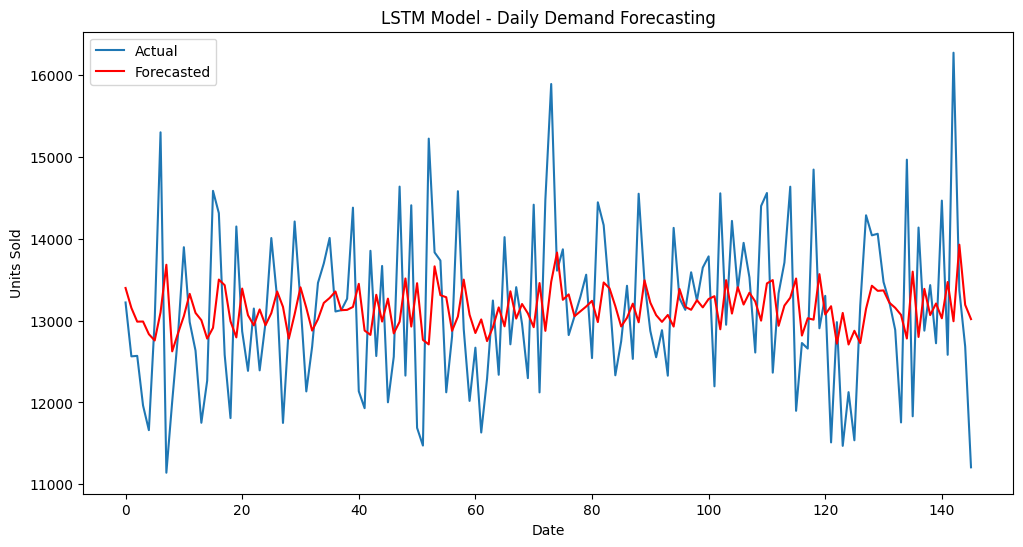

In [ ]:
# 10. Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Forecasted', color='red')
plt.title('LSTM Model - Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()